<a href="https://colab.research.google.com/github/Dibyas83/ML/blob/main/Data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data types  numeriaal(numbers)  -  date - mixed  - categorical name

removing , modifying data that is incomplete, incorrect, irrelevant, duplicated or wrong format.
1 - missing val
2- outlier detection and handling
3 - data scaling and transformation
4 - encoding categorical variables
5 - handling Duplicates
6 - Dealing with inconsistent data

all data needs to be in numerical form  -by dividing col to multi col with num val,  by encoding,
converting mixed or inconsistent data to multi col of num

string type of data called as object type data in ml to relace nan inthese cols is filled using mod or backward or fwd fill or  past avg

1 -  Detecting and dealing missing val

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv(r'D:\data\Loan-uncleaned-big.csv')

In [ ]:
dataset.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1
0,24913,2019,cf,Female,nopre,p3,l1,nopc,nob/c,316500,...,2760.0,CIB,620,CIB,65-74,62.303150,south,direct,0,44.0
1,24914,2019,cf,Male,nopre,p3,l2,nopc,nob/c,336500,...,4980.0,CIB,846,CIB,35-44,78.621495,south,direct,0,35.0
2,24915,2019,NaN,Joint,nopre,p3,l1,nopc,nob/c,426500,...,8940.0,EXP,533,EXP,45-54,75.088028,North,direct,0,34.0
3,24916,2019,cf,Joint,nopre,p1,l1,nopc,nob/c,476500,...,6780.0,EQUI,518,EXP,45-54,NaN,south,direct,1,NaN
4,24917,2019,cf,Sex Not Available,nopre,p4,l1,nopc,nob/c,196500,...,3840.0,EXP,812,EXP,25-34,76.162791,south,direct,0,49.0


In [ ]:
dataset.shape


(148647, 30)

In [ ]:
dataset2 = pd.read_csv('loan.csv')

In [ ]:
dataset2.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
dataset2.isnull() # makes nan true others False

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset2.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
dataset2.shape[0]

614

In [ ]:
(dataset2.isnull().sum()/dataset2.shape[0]) * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
dataset2.isnull().sum().sum()

np.int64(149)

In [ ]:
(dataset2.isnull().sum().sum() / (dataset2.shape[0] * dataset2.shape[1])) * 100

np.float64(1.8667000751691305)

In [ ]:
dataset2.shape[1]

13

In [ ]:
dataset2.shape[0] * dataset2.shape[1]  # total cells or possible data

7982

In [ ]:
dataset2.notnull().sum().sum()

np.int64(7833)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

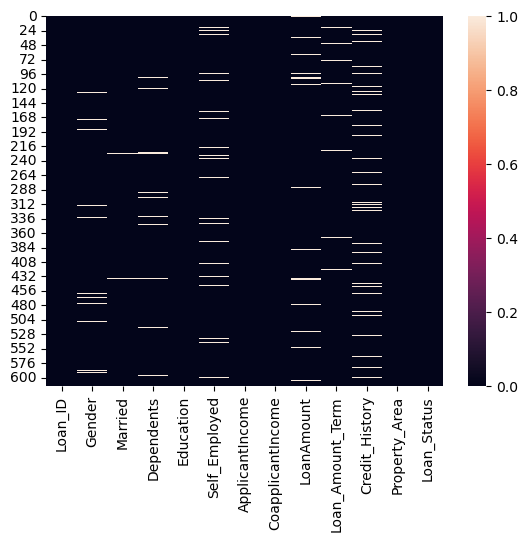

In [ ]:
sns.heatmap(dataset2.isnull())

Dropping missing values

In [ ]:
import pandas as pd

In [ ]:
dataset2.shape

(614, 13)

if row or col null > 50% delete whole

In [ ]:
dataset2.drop(columns=['Credit_History'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,Urban,Y


In [ ]:
dataset2.shape

(614, 13)

In [ ]:
dataset2.drop(columns=['Credit_History'],inplace=True)

In [ ]:
dataset2.shape

(614, 12)

drropping row

In [ ]:
dataset2.dropna(inplace=True) # not generate new data but change original gata

In [ ]:
dataset2.shape

(523, 12)

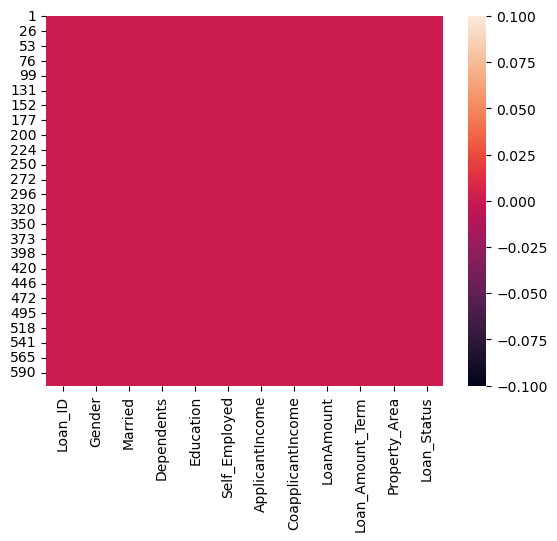

In [ ]:
sns.heatmap(dataset2.isnull())
plt.show()

Fill nan after knowing data types

In [ ]:
dataset2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
dataset2 = pd.read_csv('loan.csv')

In [ ]:
dataset2.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# dataset.fillna(10).head()

In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# dataset2.fillna( method ='ffill',axis = 1)

# dataset2.fillna( method ='bfill',axis = 1)

mod used for a single col

In [ ]:
dataset2['Gender'].mode()[0]

'Male'

In [ ]:
# dataset2['Gender'].mode()[1]

In [ ]:
# dataset2['Gender'].fillna(dataset2['Gender'].mode()[0],inplace = True)

In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


instead of using for 1 col,by looping we can use for multiple col , by collecting object data types

In [ ]:
dataset2 = pd.read_csv('loan.csv')

In [ ]:
dataset2.select_dtypes(include = 'object').isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [ ]:
dataset2.select_dtypes(include = 'object').columns # will give a list

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
 for i in dataset2.select_dtypes(include = "object").columns:
     dataset2[i].fillna(dataset2[i].mode()[0],inplace=True)



C:\Users\lenovo\AppData\Local\Temp\ipykernel_12604\3542129120.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset2[i].fillna(dataset2[i].mode()[0],inplace=True)


In [ ]:
dataset2.select_dtypes(include = 'object').isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [ ]:
dataset2.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Handling missing values through scikit learning

In [ ]:
dset = pd.read_csv('loan.csv')

In [ ]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
dset.select_dtypes(include="float64").columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
si = SimpleImputer(strategy="mean") # si varible inherited thi class

In [ ]:
corected_array = si.fit_transform(dset[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History']])

In [ ]:
corected_array.view()

array([[0.00000000e+00, 1.46412162e+02, 3.60000000e+02, 1.00000000e+00],
       [1.50800000e+03, 1.28000000e+02, 3.60000000e+02, 1.00000000e+00],
       [0.00000000e+00, 6.60000000e+01, 3.60000000e+02, 1.00000000e+00],
       ...,
       [2.40000000e+02, 2.53000000e+02, 3.60000000e+02, 1.00000000e+00],
       [0.00000000e+00, 1.87000000e+02, 3.60000000e+02, 1.00000000e+00],
       [0.00000000e+00, 1.33000000e+02, 3.60000000e+02, 0.00000000e+00]],
      shape=(614, 4))

In [ ]:
pd.DataFrame(corected_array,columns=dset.select_dtypes(include="float64").columns)

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,146.412162,360.0,1.0
1,1508.0,128.000000,360.0,1.0
2,0.0,66.000000,360.0,1.0
3,2358.0,120.000000,360.0,1.0
4,0.0,141.000000,360.0,1.0
...,...,...,...,...
609,0.0,71.000000,360.0,1.0
610,0.0,40.000000,180.0,1.0
611,240.0,253.000000,360.0,1.0
612,0.0,187.000000,360.0,1.0


In [ ]:
nea_data = pd.DataFrame(corected_array,columns=dset.select_dtypes(include="float64").columns)

In [ ]:
nea_data.isnull().sum()

CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [ ]:
nea_data

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,146.412162,360.0,1.0
1,1508.0,128.000000,360.0,1.0
2,0.0,66.000000,360.0,1.0
3,2358.0,120.000000,360.0,1.0
4,0.0,141.000000,360.0,1.0
...,...,...,...,...
609,0.0,71.000000,360.0,1.0
610,0.0,40.000000,180.0,1.0
611,240.0,253.000000,360.0,1.0
612,0.0,187.000000,360.0,1.0


In [ ]:
nea_data["LoanAmount"].mean()

np.float64(146.41216216216216)

One hot encoding and dummy var - for converting categorical data to num - used when data is yes\no, true false, male female - to 0 \ 1

In [ ]:
dtset = pd.read_csv('loan.csv')

In [ ]:
dtset["Gender"].mode()[0]

'Male'

In [ ]:
dtset["Gender"].fillna(dtset["Gender"].mode()[0],inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12604\887887674.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dtset["Gender"].fillna(dtset["Gender"].mode()[0],inplace=True)


In [ ]:
dtset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
dtset.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
dtset["Married"].fillna(dtset["Married"].mode()[0],inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12604\3753573332.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dtset["Married"].fillna(dtset["Married"].mode()[0],inplace=True)


In [ ]:
dtset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

2 ways to do one hot encoding - 1 using getdummies a pandas method, 2 using  one hot encoder class inside scikit learn

In [ ]:
en_data = dtset[["Gender","Married"]]  # variable

In [ ]:
en_data

,Gender,Married
0,Male,No
1,Male,Yes
2,Male,Yes
3,Male,Yes
4,Male,No
...,...,...
609,Female,No
610,Male,Yes
611,Male,Yes
612,Male,Yes


In [ ]:
pd.get_dummies(en_data)

,Gender_Female,Gender_Male,Married_No,Married_Yes
0,False,True,True,False
1,False,True,False,True
2,False,True,False,True
3,False,True,False,True
4,False,True,True,False
...,...,...,...,...
609,True,False,True,False
610,False,True,False,True
611,False,True,False,True
612,False,True,False,True


In [ ]:
pd.get_dummies(en_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender_Female  614 non-null    bool 
 1   Gender_Male    614 non-null    bool 
 2   Married_No     614 non-null    bool 
 3   Married_Yes    614 non-null    bool 
dtypes: bool(4)
memory usage: 2.5 KB


In [ ]:
en_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Gender   614 non-null    object
 1   Married  614 non-null    object
dtypes: object(2)
memory usage: 9.7+ KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()# create abject to call OneHotEncoder class
ohe.fit_transform(en_data)  # it understands data first then apply algo then transforms

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1228 stored elements and shape (614, 4)>

In [ ]:
ohe.fit_transform(en_data).toarray()

array([[0., 1., 1., 0.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       ...,
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [1., 0., 1., 0.]], shape=(614, 4))

In [ ]:
datfram = ohe.fit_transform(en_data).toarray()
pd.DataFrame(datfram,columns = ["Gender_Female"," Gender_Male", "Married_No", "Married_Yes"])

,Gender_Female,Gender_Male,Married_No,Married_Yes
0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0
...,...,...,...,...
609,1.0,0.0,1.0,0.0
610,0.0,1.0,0.0,1.0
611,0.0,1.0,0.0,1.0
612,0.0,1.0,0.0,1.0


as data size has inc to reduce it

In [ ]:
ohe1 = OneHotEncoder(drop="first") # deletes first col
ar = ohe1.fit_transform(en_data).toarray()
ar

array([[1., 0.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [0., 0.]], shape=(614, 2))

Label encoding - done on nominal data
categorical data -> nominal(unrelated or non-sequential) and ordinal(sequential like size of data)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({"name":["wscube", "cow", "dog","cat", "black"]})

In [ ]:
df

,name
0,wscube
1,cow
2,dog
3,cat
4,black


In [ ]:
from sklearn.preprocessing import LabelEncoder


fit for training , trnsform for conversion - both used during training - during deploy transform

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit_transform(df["name"]) # gives encoded array

array([4, 2, 3, 1, 0])

In [ ]:
df["enc_name"] = le.fit_transform(df["name"]) # new ncoded col aadded to dataframe

In [ ]:
df

,name,enc_name
0,wscube,4
1,cow,2
2,dog,3
3,cat,1
4,black,0


In [ ]:
datasetenc = pd.read_csv('loan.csv')

In [ ]:
datasetenc["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
la = LabelEncoder()
la.fit(datasetenc["Property_Area"])

LabelEncoder()

In [ ]:
la.transform(datasetenc["Property_Area"]) # encoding

array([2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1,
       2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0,
       0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2,

Ordinal encoding using map func and scikit learn

In [ ]:
dafr = pd.DataFrame({"Size":["s","m","l","xl","m","xxl","l"]})

In [ ]:
dafr

,Size
0,s
1,m
2,l
3,xl
4,m
5,xxl
6,l


decide the order of encoding of two dimensional

In [ ]:
ord_data = [["s","m","l","xl","xxl"]]

In [ ]:
import sklearn

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe = OrdinalEncoder(categories=ord_data)
# oe.fit_transform()
oe.fit(dafr[["Size"]])

,categories,"[['s', 'm', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [ ]:
oe.transform(dafr[["Size"]])

array([[0.],
       [1.],
       [2.],
       [3.],
       [1.],
       [4.],
       [2.]])

In [ ]:
dafr["enc_size"] = oe.transform(dafr[["Size"]])

In [ ]:
dafr

,Size,enc_size
0,s,0.0
1,m,1.0
2,l,2.0
3,xl,3.0
4,m,1.0
5,xxl,4.0
6,l,2.0


encoding via map  by creating a dict of val to be appointed

In [ ]:
ord_data1 = {"s":0, "m":1,"l":2, "xl":3, "xxl":4}  # we can assign any no

In [ ]:
dafr["maped-Size"]=dafr["Size"].map(ord_data1)

In [ ]:
dafr

,Size,enc_size,maped-Size
0,s,0.0,0
1,m,1.0,1
2,l,2.0,2
3,xl,3.0,3
4,m,1.0,1
5,xxl,4.0,4
6,l,2.0,2


In [ ]:
dset1 = pd.read_csv("loan.csv")

In [ ]:
dset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
dset1["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
dset1["Property_Area"].fillna(dset1["Property_Area"].mode()[0],inplace = True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17060\3563560.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dset1["Property_Area"].fillna(dset1["Property_Area"].mode()[0],inplace = True)


In [ ]:
enc_order = [['Urban', 'Rural', 'Semiurban']]

In [ ]:
orden = OrdinalEncoder(categories=enc_order)

In [ ]:
dset1["Property_Area"]=orden.fit_transform(dset1[["Property_Area"]])

In [ ]:
dset1.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,0.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,1.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,0.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,0.0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,0.0,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,0.0,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,0.0,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,2.0,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,0.0,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,2.0,N


Outliers - creates distortion in men, avg

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    float64
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


dset1.describe()

using box plot or distribution plot
box - median, whisker plot and cap(qrt1 - 1.5 * 1qr) (qtr3 + 1.5*iqr)

as CoapplicantIncome has no null val we use it

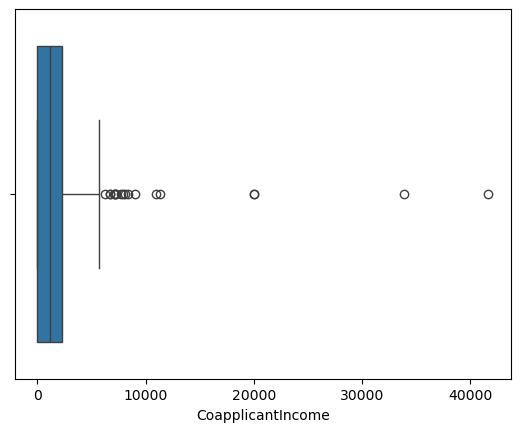

In [ ]:
sns.boxplot(x = "CoapplicantIncome",data=dset1)
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17060\1179021483.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dset1["CoapplicantIncome"])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

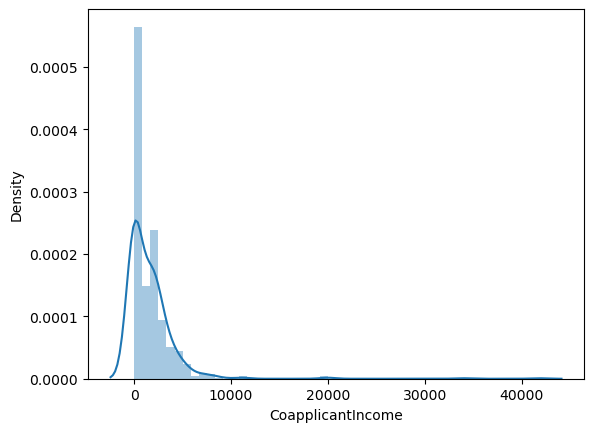

In [ ]:
sns.distplot(dset1["CoapplicantIncome"])

using iqr(inter quantile range(3rd - 1st) - ist quantile 25% , 3rd 75%) method to remove outlier
ist cap - min , 3rd cap - max


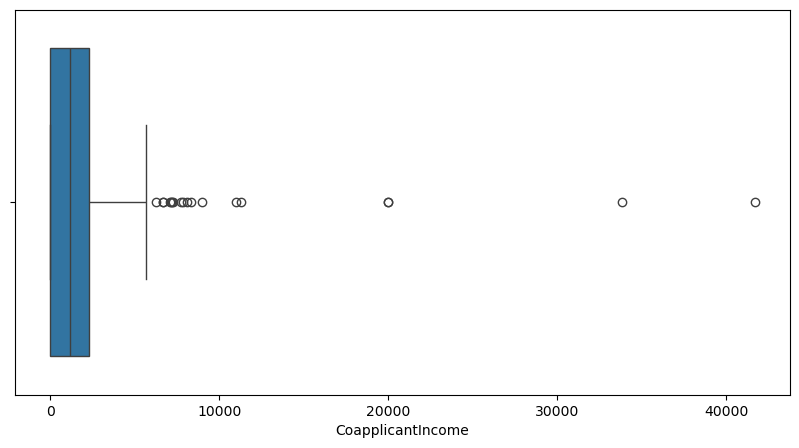

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "CoapplicantIncome",data=dset1)
plt.show()

In [ ]:
dset1.shape

(614, 13)

In [ ]:
q1 = dset1["CoapplicantIncome"].quantile(0.25)
q3 = dset1["CoapplicantIncome"].quantile(0.75)


In [ ]:
IQR = q3-q1

In [ ]:
IQR

np.float64(2297.25)

In [ ]:
min_range = q1 -  1.5*IQR
max_range = q3 +  1.5*IQR

In [ ]:
min_range , max_range

(np.float64(-3445.875), np.float64(5743.125))

In [ ]:
new_data2 = dset1[dset1["CoapplicantIncome"] <= max_range] # beyond this are outliers

In [ ]:
new_data2.shape

(596, 13)

In [ ]:
new_data3 = dset1[dset1["CoapplicantIncome"] >= min_range]
new_data3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,0.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,1.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,0.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,0.0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,1.0,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,1.0,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,0.0,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,0.0,Y


In [ ]:
#new_data4 = dset1[(dset1["CoapplicantIncome"] >= min_range) and (dset1["CoapplicantIncome"] <= max_range)]
#new_data4 = dset1[ dset1[dset1["CoapplicantIncome"] <= max_range] >= min_range]

<function matplotlib.pyplot.show(close=None, block=None)>

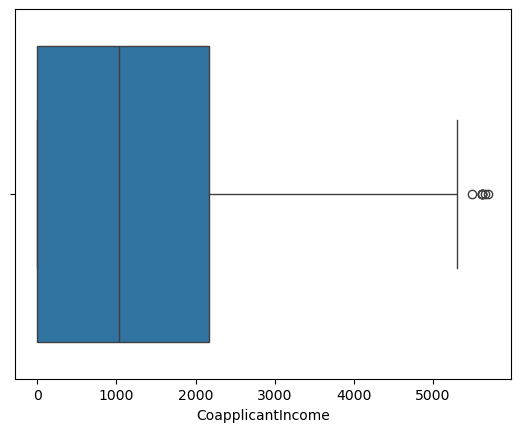

In [ ]:
sns.boxplot(x="CoapplicantIncome",data=new_data2)
plt.show

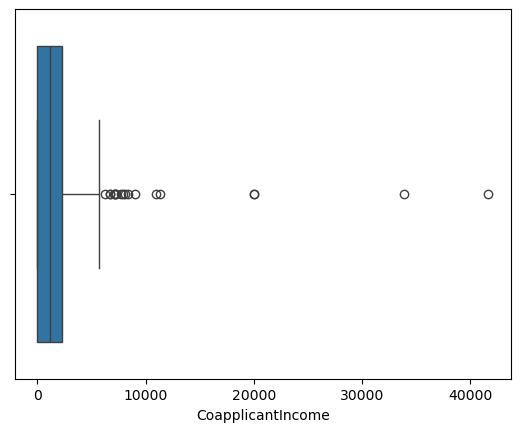

In [ ]:
sns.boxplot(x="CoapplicantIncome",data=new_data3)
plt.show()

outlier removal using Z Score
How to use Z-score for outlier removal
Calculate the Z-score for each data point using the formula: \(Z=(x-\mu )/\sigma \), where \(x\) is a data point, \(\mu \) is the mean, and \(\sigma \) is the standard deviation.
Set a threshold: A common threshold is \(|\text{Z}|>3\). Data points with a Z-score greater than 3 or less than -3 are considered outliers.
Filter or cap outliers: Once outliers are identified, you can either remove the data points or "cap" them by replacing them with a value at the threshold (e.g., replacing a value with a Z-score of 3.5 with a Z-score of 3).
When to use a modified Z-score -If the data is not normally distributed, the mean and standard deviation can be significantly affected by outliers, making the standard Z-score unreliable.In this case, use a modified Z-score, which uses the median and median absolute deviation (MAD) to be more robust against extreme values.A typical threshold for a modified Z-score is an absolute value greater than 3.5.

In [ ]:
dset1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: ylabel='CoapplicantIncome'>

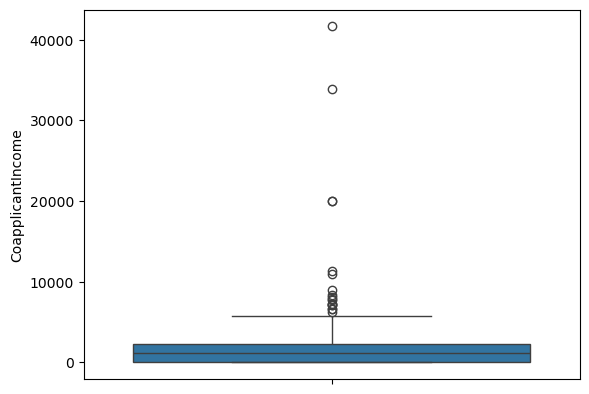

In [ ]:
sns.boxplot(dset1["CoapplicantIncome"])

<Axes: xlabel='CoapplicantIncome'>

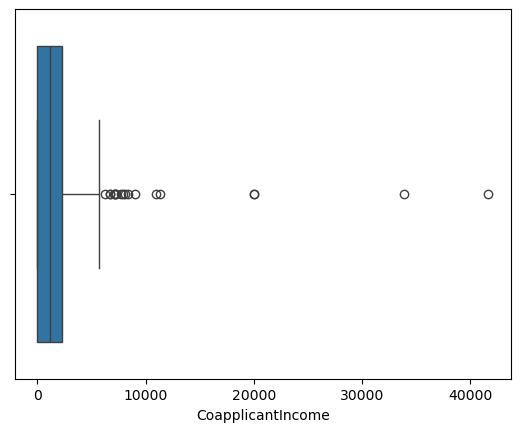

In [ ]:
sns.boxplot(x="CoapplicantIncome", data=dset1)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17060\1179021483.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dset1["CoapplicantIncome"])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

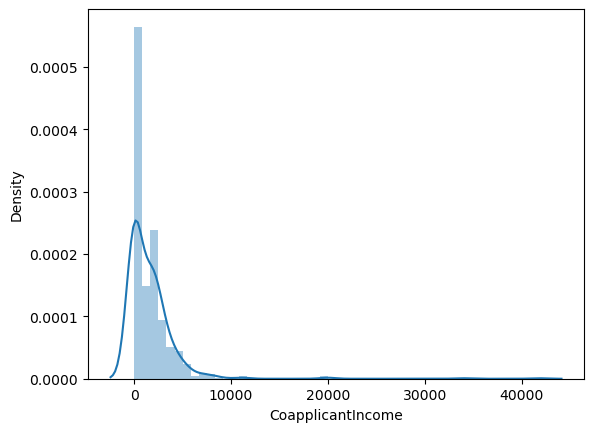

In [ ]:
sns.distplot(dset1["CoapplicantIncome"])

tail shows the outlierd

In [ ]:
min_rng = dset1['CoapplicantIncome'].mean() - 3*dset1['CoapplicantIncome'].std()

In [ ]:
max_rng = dset1['CoapplicantIncome'].mean() + 3*dset1['CoapplicantIncome'].std()

In [ ]:
newdata = dset1[dset1['CoapplicantIncome'] <= max_rng]

<Axes: xlabel='CoapplicantIncome'>

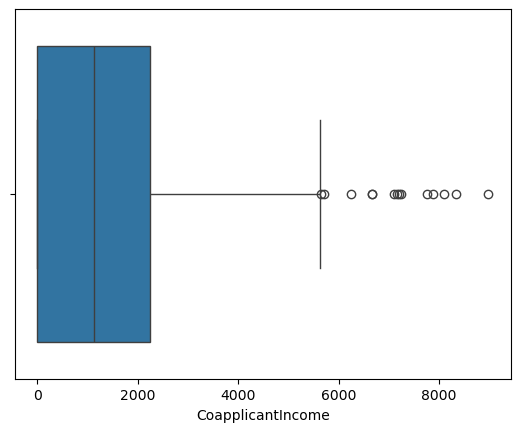

In [ ]:
sns.boxplot(x="CoapplicantIncome", data=newdata)

In [ ]:
z_score = (dset1['CoapplicantIncome'] - dset1['CoapplicantIncome'].mean()) / (dset1['CoapplicantIncome'].std())

In [ ]:
z_score

0     -0.554036
1     -0.038700
2     -0.554036
3      0.251774
4     -0.554036
         ...   
609   -0.554036
610   -0.554036
611   -0.472019
612   -0.554036
613   -0.554036
Name: CoapplicantIncome, Length: 614, dtype: float64

In [ ]:
z_score >3

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: CoapplicantIncome, Length: 614, dtype: bool

In [ ]:
dset1["z_score"] = z_score

In [ ]:
dset1[dset1["z_score"] < 3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,0.0,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,1.0,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,0.0,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,0.0,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,0.0,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,1.0,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,1.0,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,0.0,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,0.0,Y,-0.554036


In [ ]:
dset1[dset1["z_score"] < 3].shape

(608, 14)

Feature Scaling - abnormal data disturbs pattern in data , by changing abnormal dala
done by using normalisation(min-max) and standardisation(like z score)

In [ ]:
dset1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
z_score               0
dtype: int64

choose non null col

In [ ]:
dset1['LoanAmount'].fillna(dset1['LoanAmount'].mean(),inplace= True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17060\1569807636.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dset1['LoanAmount'].fillna(dset1['LoanAmount'].mean(),inplace= True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17060\2229300182.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dset1['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

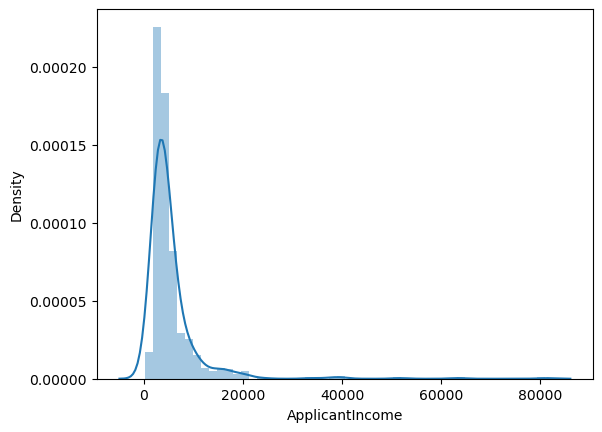

In [ ]:
sns.distplot(dset1['ApplicantIncome'])


In [ ]:
dset1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,z_score
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.050489,3.761016e-17
std,6109.041673,2926.248369,84.037468,65.12041,0.364878,0.840875,1.000000e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,-5.540356e-01
25%,2877.500000,0.000000,100.250000,360.00000,1.000000,0.000000,-5.540356e-01
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000,1.000000,-1.478842e-01
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,2.000000,2.310140e-01
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.368502e+01


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
dset1 = pd.read_csv('loan.csv')

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit(dset1[['ApplicantIncome']])

,copy,True
,with_mean,True
,with_std,True


In [ ]:
ss.transform(dset1[['ApplicantIncome']]) # as array

array([[ 7.29908229e-02],
       [-1.34411954e-01],
       [-3.93747337e-01],
       [-4.62062470e-01],
       [ 9.77284368e-02],
       [ 2.21831139e-03],
       [-5.03018784e-01],
       [-3.87849628e-01],
       [-2.28939128e-01],
       [ 1.21845703e+00],
       [-3.60982286e-01],
       [-4.75659966e-01],
       [-3.81788093e-01],
       [-5.81654908e-01],
       [-6.72414101e-01],
       [-7.42880841e-02],
       [-2.96107483e-01],
       [-3.10196456e-01],
       [-8.46090753e-02],
       [-4.59277440e-01],
       [ 3.69678365e-01],
       [ 9.03563002e-02],
       [-4.59277440e-01],
       [-3.33951118e-01],
       [-2.76284627e-01],
       [ 6.80946355e-01],
       [-4.26676214e-01],
       [-1.92897571e-01],
       [-6.48987089e-01],
       [-2.70878394e-01],
       [-2.02727086e-01],
       [-3.66388519e-01],
       [-1.16555001e-01],
       [-3.11834708e-01],
       [ 1.16259261e+00],
       [-5.12520649e-01],
       [-5.85750540e-01],
       [-2.84475890e-01],
       [-2.0

In [ ]:
dset1['ApplicantIncome_ss'] = pd.DataFrame(ss.transform(dset1[['ApplicantIncome']]), columns = ["x"])  # added to panda dataframe, then dataframe to our sheet

In [ ]:
dset1.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728


In [ ]:
dset1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17872\2581284041.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dset1['ApplicantIncome'])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17872\2581284041.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dset1['ApplicantIncome_ss'])


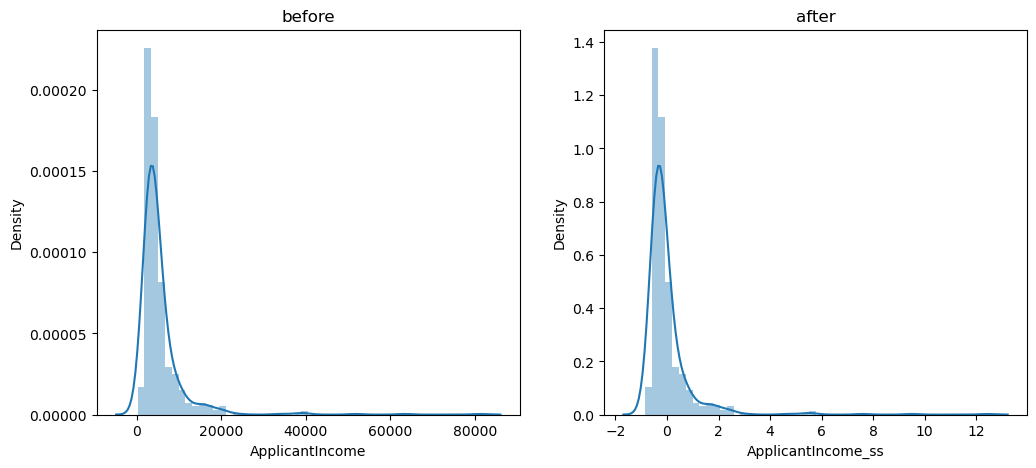

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1) # 1st graph
plt.title('before')
sns.distplot(dset1['ApplicantIncome'])
plt.subplot(1,2,2) # 2nd graph
plt.title('after')
sns.distplot(dset1['ApplicantIncome_ss'])

plt.show()

Graphs nature(shape) is same only size decr, more centered around 0, magnitude change

Min - Max -  Normalisation technique  -> data size is  reduced according to min,max val

new_val = (val - min)/(max -min)  -> which will be bet 0-1 , dataset will now come bet o and 1 in graph

In [ ]:
dset1.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
ApplicantIncome_ss     0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
ms = MinMaxScaler()
ms.fit(dset1[['CoapplicantIncome']])


,feature_range,"(0, ...)"
,copy,True
,clip,False


In [ ]:
ms.transform(dset1[['CoapplicantIncome']])

array([[0.00000000e+00],
       [3.61917105e-02],
       [0.00000000e+00],
       [5.65915473e-02],
       [0.00000000e+00],
       [1.00703194e-01],
       [3.63837089e-02],
       [6.00955192e-02],
       [3.66237070e-02],
       [2.63229894e-01],
       [1.67998656e-02],
       [4.41596467e-02],
       [1.94542444e-01],
       [6.81594547e-02],
       [2.60637915e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [8.39993280e-02],
       [0.00000000e+00],
       [1.34998920e-01],
       [4.58636331e-02],
       [4.60076319e-02],
       [7.01994384e-02],
       [0.00000000e+00],
       [5.40715674e-02],
       [2.49598003e-02],
       [0.00000000e+00],
       [4.99916001e-02],
       [8.08553532e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [4.00076799e-02],
       [7.19994240e-02],
       [4.96076031e-02],
       [3.19197446e-02],
       [3.50157199e-02],
       [1.73038616e-01],
       [4.00316797e-02],


In [ ]:
dset1['CoapplicantIncome_min'] =  ms.transform(dset1[['CoapplicantIncome']])

In [ ]:
dset1.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss,CoapplicantIncome_min
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062,0.056592
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728,0.000000


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17872\1122853154.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dset1['CoapplicantIncome'])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17872\1122853154.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dset1['CoapplicantIncome_min'])


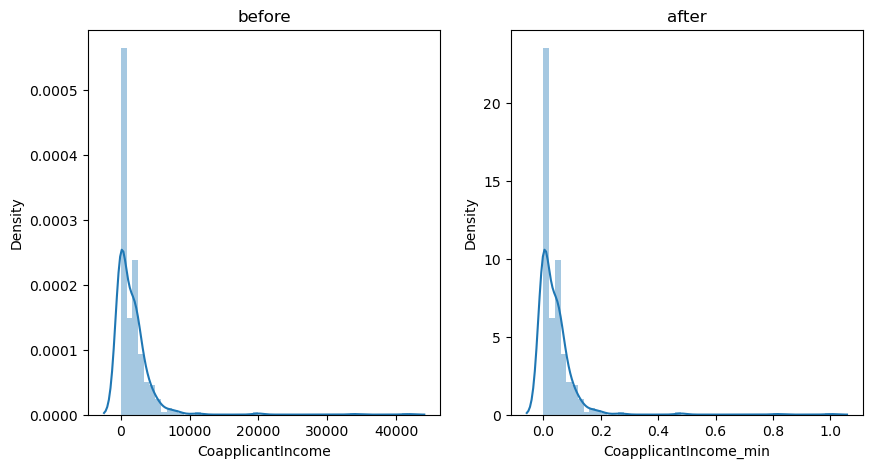

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1) # row,col,graph no
plt.title('before')
sns.distplot(dset1['CoapplicantIncome'])

plt.subplot(1,2,2)
plt.title('after')
sns.distplot(dset1['CoapplicantIncome_min'])
plt.show()

Handling Duplicate Data (entire row duplicate)

In [ ]:
datas = {'name':['a','b','c','d','a','c'], 'eng':[8,7,5,8,8,4], 'hindi':[2,3,4,5,2,6]}

In [ ]:
df = pd.DataFrame(datas)

In [ ]:
df

,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
4,a,8,2
5,c,4,6


In [ ]:
df['dupli'] = df.duplicated()

In [ ]:
df

,name,eng,hindi,dupli
0,a,8,2,False
1,b,7,3,False
2,c,5,4,False
3,d,8,5,False
4,a,8,2,True
5,c,4,6,False


In [ ]:
df2 = pd.DataFrame(datas)

In [ ]:
df2.drop_duplicates(keep = 'first')
df2.drop_duplicates(inplace = True)


In [ ]:
dtset=pd.read_csv('loan.csv')

In [ ]:
dtset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [ ]:
dtset.shape

(614, 13)

In [ ]:
dtset.drop_duplicates(inplace=True)
dtset.shape

(614, 13)

No duplicates

cleaning and changing or convert to int or num. mix data types like categorical(or object type)

In [ ]:
dtset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
dtset['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [ ]:
dtset['Dependents'].fillna(dtset['Dependents'].mode()[0],inplace = True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17872\3087271861.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dtset['Dependents'].fillna(dtset['Dependents'].mode()[0],inplace = True)


In [ ]:
dtset['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [ ]:
dtset['Dependents'].replace('3+','3', inplace = True)

In [ ]:
dtset['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

next convert this 3 from object to int

In [ ]:
dtset['Dependents'].astype('int64')

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int64

Function Transformer - non normal dist data to normal dist data,large data to log values, cm to meter,f to centigrade

In [ ]:
fdata = pd.read_csv('loan.csv')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17872\568425425.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fdata['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

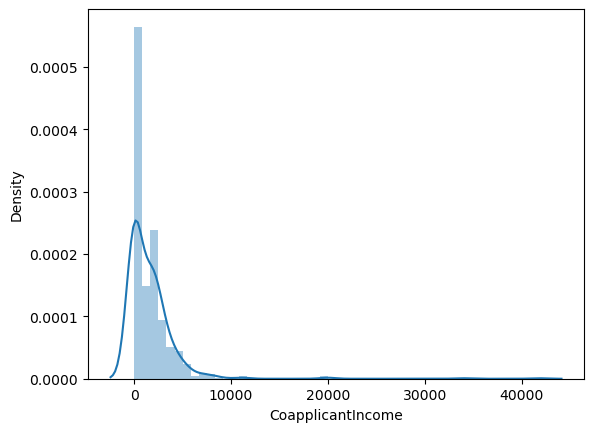

In [ ]:
sns.distplot(fdata['CoapplicantIncome'])

In [ ]:
q1 = fdata['CoapplicantIncome'].quantile(0.25)
q3 = fdata['CoapplicantIncome'].quantile(0.75)
iqr = q3 - q1

In [ ]:
min_r = q1 - (1.5 * iqr)
max_r = q1 + (1.5 * iqr)
min_r, max_r

(np.float64(-3445.875), np.float64(3445.875))

min range is negetive so using positive max remove outlier

In [ ]:
fdata = fdata[fdata['CoapplicantIncome'] <= max_r]

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17872\568425425.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fdata['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

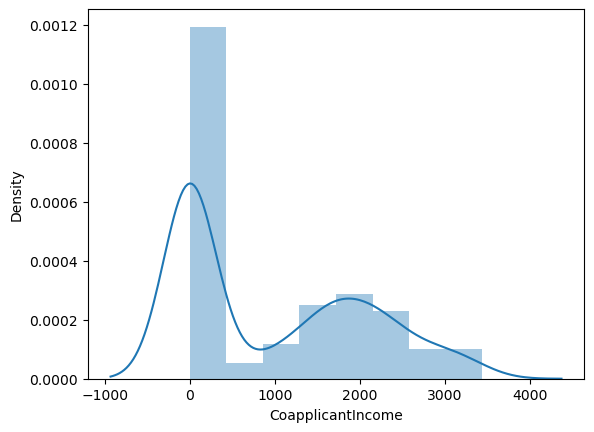

In [ ]:
sns.distplot(fdata['CoapplicantIncome'])

Function transformation using scikit learn

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
ft = FunctionTransformer(func=np.log1p) # log0 will not give value ,you can never raise a number to any real power to get zero.

In [ ]:
ft.fit(fdata[['CoapplicantIncome']])  # double bracket for 2dimentional dataset

,func,<ufunc 'log1p'>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None
,inv_kw_args,None


In [ ]:
ft.transform(fdata[['CoapplicantIncome']])

,CoapplicantIncome
0,0.000000
1,7.319202
2,0.000000
3,7.765993
4,0.000000
...,...
609,0.000000
610,0.000000
611,5.484797
612,0.000000


In [ ]:
fdata['CoapplicantIncome_tf'] = ft.transform(fdata[['CoapplicantIncome']])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17872\2722514032.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fdata['CoapplicantIncome'])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17872\2722514032.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fdata['CoapplicantIncome_tf'])


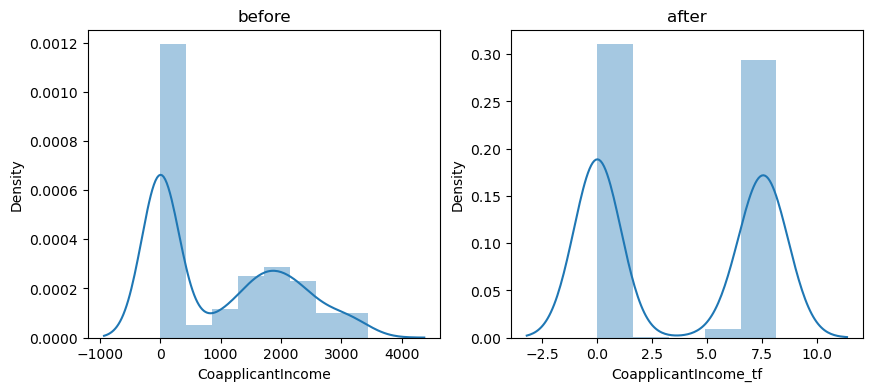

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1) # row,col,graph no
plt.title('before')
sns.distplot(fdata['CoapplicantIncome'])

plt.subplot(1,2,2)
plt.title('after')
sns.distplot(fdata['CoapplicantIncome_tf'])
plt.show()

no tail

In [ ]:
fdata2 = pd.read_csv('loan.csv')

In [ ]:
ft.fit(fdata2[['CoapplicantIncome']])  # applied on data with outliers

,func,<ufunc 'log1p'>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None
,inv_kw_args,None


In [ ]:
ft.transform(fdata2[['CoapplicantIncome']])

,CoapplicantIncome
0,0.000000
1,7.319202
2,0.000000
3,7.765993
4,0.000000
...,...
609,0.000000
610,0.000000
611,5.484797
612,0.000000


In [ ]:
fdata2['CoapplicantIncome_tf'] = ft.transform(fdata2[['CoapplicantIncome']])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17872\1094401134.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fdata2['CoapplicantIncome'])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17872\1094401134.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fdata2['CoapplicantIncome_tf'])


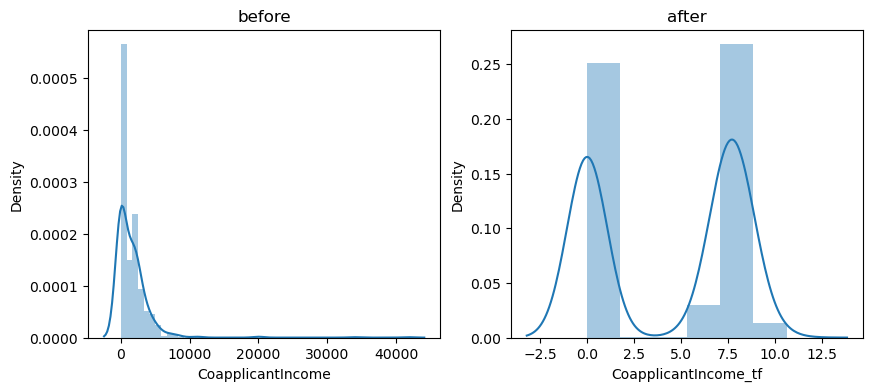

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1) # row,col,graph no
plt.title('before')
sns.distplot(fdata2['CoapplicantIncome'])

plt.subplot(1,2,2)
plt.title('after')
sns.distplot(fdata2['CoapplicantIncome_tf'])
plt.show()

In [ ]:
ft2 = FunctionTransformer(func= lambda x : x**2)

In [ ]:
ft2.fit(fdata2[['CoapplicantIncome']])
ft2.transform(fdata2[['CoapplicantIncome']])

,CoapplicantIncome
0,0.0
1,2274064.0
2,0.0
3,5560164.0
4,0.0
...,...
609,0.0
610,0.0
611,57600.0
612,0.0


In [ ]:
fdata2['CoapplicantIncome_tf2'] = ft2.transform(fdata2[['CoapplicantIncome']])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17872\679991459.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fdata2['CoapplicantIncome'])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17872\679991459.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fdata2['CoapplicantIncome_tf2'])


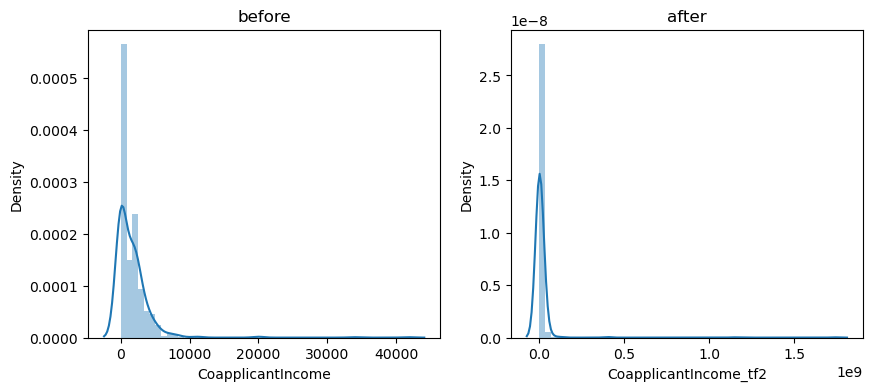

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1) # row,col,graph no
plt.title('before')
sns.distplot(fdata2['CoapplicantIncome'])

plt.subplot(1,2,2)
plt.title('after')
sns.distplot(fdata2['CoapplicantIncome_tf2'])
plt.show()